<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3.1-数据结构和序列" data-toc-modified-id="3.1-数据结构和序列-1">3.1 数据结构和序列</a></span><ul class="toc-item"><li><span><a href="#enumerate函数" data-toc-modified-id="enumerate函数-1.1">enumerate函数</a></span></li><li><span><a href="#sorted函数" data-toc-modified-id="sorted函数-1.2">sorted函数</a></span></li><li><span><a href="#zip函数" data-toc-modified-id="zip函数-1.3">zip函数</a></span></li><li><span><a href="#reversed函数" data-toc-modified-id="reversed函数-1.4">reversed函数</a></span></li><li><span><a href="#字典默认值" data-toc-modified-id="字典默认值-1.5">字典默认值</a></span></li><li><span><a href="#有效的键类型" data-toc-modified-id="有效的键类型-1.6">有效的键类型</a></span></li><li><span><a href="#集合" data-toc-modified-id="集合-1.7">集合</a></span></li><li><span><a href="#列表、集合和字典推导式" data-toc-modified-id="列表、集合和字典推导式-1.8">列表、集合和字典推导式</a></span></li><li><span><a href="#嵌套列表推导式" data-toc-modified-id="嵌套列表推导式-1.9">嵌套列表推导式</a></span></li></ul></li><li><span><a href="#3.2-函数" data-toc-modified-id="3.2-函数-2">3.2 函数</a></span><ul class="toc-item"><li><span><a href="#匿名（lambda）函数" data-toc-modified-id="匿名（lambda）函数-2.1">匿名（lambda）函数</a></span></li><li><span><a href="#柯里化：部分参数应用" data-toc-modified-id="柯里化：部分参数应用-2.2">柯里化：部分参数应用</a></span></li><li><span><a href="#生成器" data-toc-modified-id="生成器-2.3">生成器</a></span></li><li><span><a href="#生成器表达式" data-toc-modified-id="生成器表达式-2.4">生成器表达式</a></span></li><li><span><a href="#itertools模块" data-toc-modified-id="itertools模块-2.5">itertools模块</a></span></li><li><span><a href="#错误和异常处理" data-toc-modified-id="错误和异常处理-2.6">错误和异常处理</a></span></li><li><span><a href="#IPython的异常" data-toc-modified-id="IPython的异常-2.7">IPython的异常</a></span></li></ul></li><li><span><a href="#3.3-文件和操作系统" data-toc-modified-id="3.3-文件和操作系统-3">3.3 文件和操作系统</a></span></li></ul></div>

# 第 3 章 Python 的数据结构、函数和文件

## 3.1 数据结构和序列

### enumerate函数

迭代一个序列时，你可能想跟踪当前项的序号。手动的方法可能是下面这样：

In [2]:
i = 0
for value in collection:
   # do something with value
   i += 1

NameError: name 'collection' is not defined

因为这么做很常见，Python内建了一个enumerate函数，可以返回(i, value)元组序列：

In [3]:
for i, value in enumerate(collection):
   # do something with value

IndentationError: expected an indented block (Temp/ipykernel_22020/1403999325.py, line 2)

当你索引数据时，使用enumerate的一个好方法是计算序列（唯一的）dict映射到位置的值：

In [4]:
some_list = ['foo', 'bar', 'baz']
mapping = {}
for i, v in enumerate(some_list):
    mapping[v] = i
    
mapping

{'foo': 0, 'bar': 1, 'baz': 2}

### sorted函数

### zip函数

zip可以将多个列表、元组或其它序列成对组合成一个元组列表：

In [6]:
seq1 = ['foo', 'bar', 'baz']
seq2 = ['one', 'two', 'three']
zipped = zip(seq1, seq2)
list(zipped)

[('foo', 'one'), ('bar', 'two'), ('baz', 'three')]

zip可以处理任意多的序列，元素的个数取决于最短的序列：

In [7]:
seq3 = [False, True]
list(zip(seq1, seq2, seq3))

[('foo', 'one', False), ('bar', 'two', True)]

zip的常见用法之一是同时迭代多个序列，可能结合enumerate使用

In [8]:
for i, (a, b) in enumerate(zip(seq1, seq2)):
    print('{0}: {1}, {2}'.format(i, a, b))

0: foo, one
1: bar, two
2: baz, three


给出一个“被压缩的”序列，zip可以被用来解压序列。也可以当作把行的列表转换为列的列表。这个方法看起来有点神奇：

In [10]:
pitchers = [('Nolan', 'Ryan'), ('Roger', 'Clemens'),
            ('Curt', 'Schilling')]
first_names, last_names = zip(*pitchers)
first_names


('Nolan', 'Roger', 'Curt')

In [11]:
last_names

('Ryan', 'Clemens', 'Schilling')

### reversed函数

reversed可以从后向前迭代一个序列：

In [12]:
list(reversed(range(10)))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

### 字典默认值

In [13]:
words = ['apple', 'bat', 'bar', 'atom', 'book']
by_letter = {}
for word in words:
    letter = word[0]
    if letter not in by_letter:
        by_letter[letter] = [word]
    else:
        by_letter[letter].append(word)
by_letter

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}

In [14]:
# 可以改写为
for word in words:
    letter = word[0]
    by_letter.setdefault(letter, []).append(word)

collections模块有一个很有用的类，defaultdict，它可以进一步简化上面。传递类型或函数以生成每个位置的默认值：

In [15]:
from collections import defaultdict
by_letter = defaultdict(list)
for word in words:
    by_letter[word[0]].append(word)

### 有效的键类型

字典的值可以是任意Python对象，而键通常是不可变的标量类型（整数、浮点型、字符串）或元组（元组中的对象必须是不可变的）。这被称为“可哈希性”。可以用hash函数检测一个对象是否是可哈希的（可被用作字典的键）：

### 集合

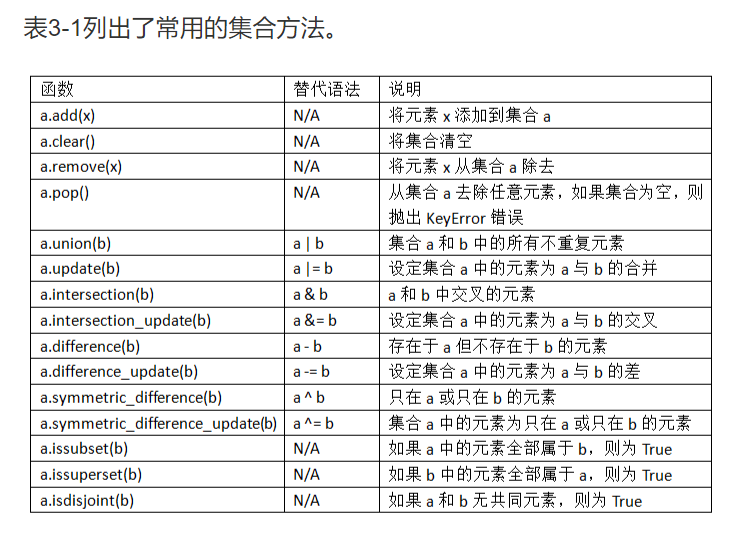

### 列表、集合和字典推导式

列表推导式是Python最受喜爱的特性之一。它允许用户方便的从一个集合过滤元素，形成列表，在传递参数的过程中还可以修改元素。形式如下：


> [expr for val in collection if condition]

In [18]:
# 它等同于下面的for循环;
result = []
for val in collection:
    if condition:
        result.append(expr)

NameError: name 'collection' is not defined

In [20]:
#filter条件可以被忽略，只留下表达式就行。例如，给定一个字符串列表，我们可以过滤出长度在2及以下的字符串，并将其转换成大写：
strings = ['a', 'as', 'bat', 'car', 'dove', 'python']
[x.upper() for x in strings if len(x) > 2]

['BAT', 'CAR', 'DOVE', 'PYTHON']

In [22]:
# 用相似的方法，还可以推导集合和字典。字典的推导式如下所示：
dict_comp = {key-expr : value-expr for value in collection if condition}

NameError: name 'collection' is not defined

In [23]:
# 集合的推导式与列表很像，只不过用的是尖括号：

# set_comp = {expr for value in collection if condition}

与列表推导式类似，集合与字典的推导也很方便，而且使代码的读写都很容易。来看前面的字符串列表。假如我们只想要字符串的长度，用集合推导式的方法非常方便：

In [24]:
unique_lengths = {len(x) for x in strings}
unique_lengths

{1, 2, 3, 4, 6}

In [25]:
# map函数可以进一步简化：
set(map(len, strings))

{1, 2, 3, 4, 6}

In [26]:
# 作为一个字典推导式的例子，我们可以创建一个字符串的查找映射表以确定它在列表中的位置：
loc_mapping = {val : index for index, val in enumerate(strings)}
loc_mapping

{'a': 0, 'as': 1, 'bat': 2, 'car': 3, 'dove': 4, 'python': 5}

### 嵌套列表推导式

## 3.2 函数

### 匿名（lambda）函数

假设有一组字符串，你想要根据各字符串不同字母的数量对其进行排序：

In [28]:
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']
strings.sort(key=lambda x: len(set(list(x))))
strings

['aaaa', 'foo', 'abab', 'bar', 'card']

### 柯里化：部分参数应用

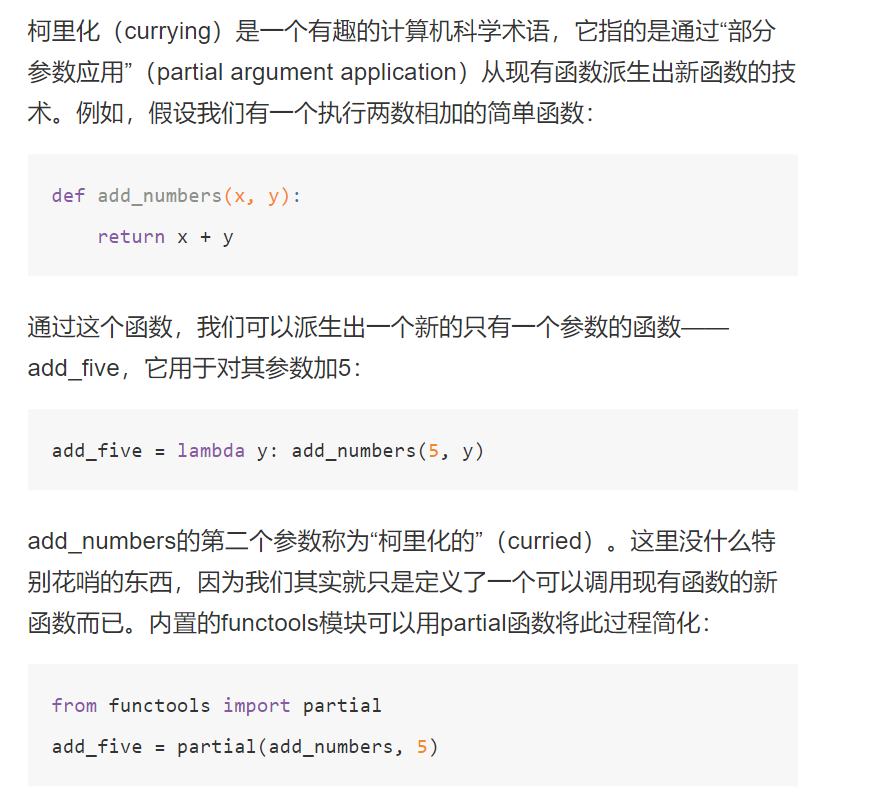

### 生成器

迭代器是一种特殊对象，它可以在诸如for循环之类的上下文中向Python解释器输送对象。大部分能接受列表之类的对象的方法也都可以接受任何可迭代对象。比如min、max、sum等内置方法以及list、tuple等类型构造器：

In [29]:
some_dict = {'a': 1, 'b': 2, 'c': 3}
dict_iterator = iter(some_dict)
list(dict_iterator)

['a', 'b', 'c']

生成器（generator）是构造新的可迭代对象的一种简单方式。一般的函数执行之后只会返回单个值，而生成器则是以延迟的方式返回一个值序列，即每返回一个值之后暂停，直到下一个值被请求时再继续。要创建一个生成器，只需将函数中的return替换为yeild即可：

In [31]:
def squares(n=10):
    print('Generating squares from 1 to {0}'.format(n ** 2))
    for i in range(1, n + 1):
        yield i ** 2

In [32]:
# 调用该生成器时，没有任何代码会被立即执行：
gen = squares()
gen

<generator object squares at 0x0000020B72B3A040>

In [33]:
# 你从该生成器中请求元素时，它才会开始执行其代码：
for x in gen:
    print(x, end=' ')

Generating squares from 1 to 100
1 4 9 16 25 36 49 64 81 100 

### 生成器表达式

另一种更简洁的构造生成器的方法是使用生成器表达式（generator expression）。这是一种类似于列表、字典、集合推导式的生成器。其创建方式为，把列表推导式两端的方括号改成圆括号：

In [34]:
gen = (x ** 2 for x in range(100))
gen

<generator object <genexpr> at 0x0000020B7239D190>

In [35]:
# 它跟下面这个冗长得多的生成器是完全等价的：
def _make_gen():
    for x in range(100):
        yield x ** 2
gen = _make_gen()

生成器表达式也可以取代列表推导式，作为函数参数：

In [37]:
sum(x ** 2 for x in range(100))


328350

In [38]:
dict((i, i **2) for i in range(5))

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

### itertools模块

### 错误和异常处理

你可以用else让只在try部分成功的情况下，才执行代码：

In [41]:
f = open(path, 'w')

try:
    write_to_file(f)
except:
    print('Failed')
else:
    print('Succeeded')
finally:
    f.close()

NameError: name 'path' is not defined

### IPython的异常

## 3.3 文件和操作系统

如果输入f =open(path,'w')，就会有一个新文件被创建在examples/segismundo.txt，并覆盖掉该位置原来的任何数据。另外有一个x文件模式，它可以创建可写的文件，但是如果文件路径存在，就无法创建。表3-3列出了所有的读/写模式。

表3-3 Python的文件模式
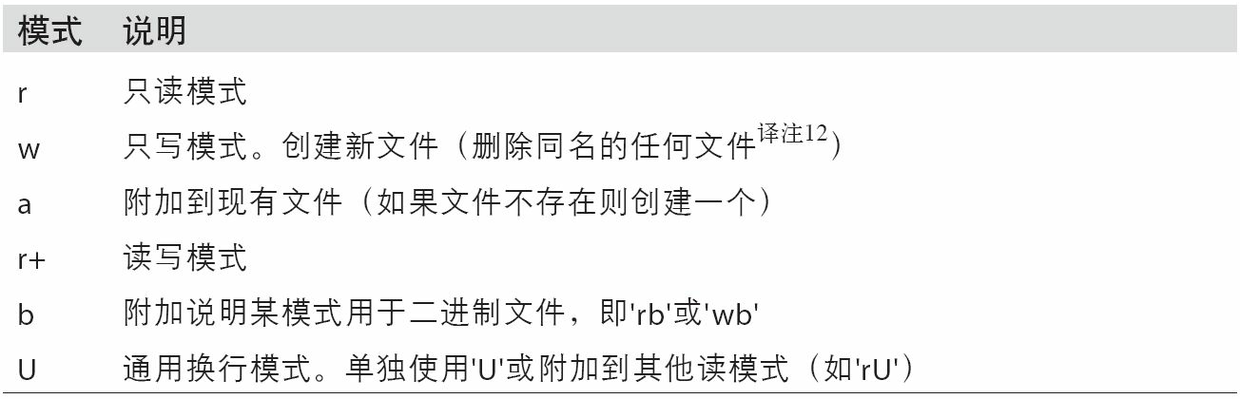